This includes bitwise AND, OR, NOT and XOR operations. They will be highly useful while extracting any part of
the image (as we will see in coming chapters), defining and working with non-rectangular ROI etc.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread('image1.jpg')
img2 = cv2.imread('image2.jpg')

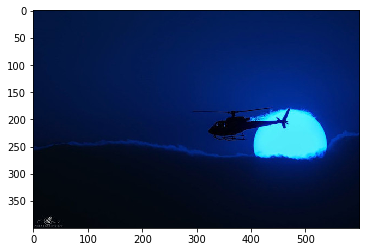

In [3]:
plt.imshow(img1)

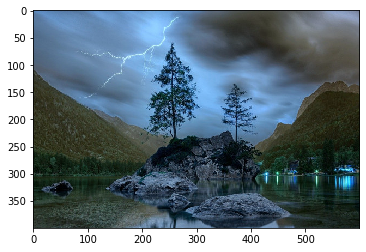

In [4]:
plt.imshow(img2)

In [5]:
rows,cols,channels = img1.shape

In [6]:
# ROI
roi = img2[0:rows, 0:cols]

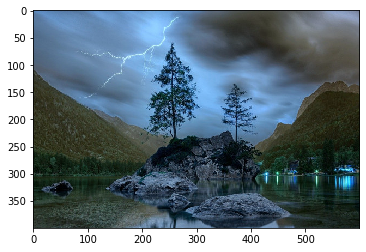

In [7]:
plt.imshow(roi)

In [8]:
# Now create a mask of sun and create its inverse mask also
img2gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 150, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

array([[163, 202, 212, 210, 206, 213, 218, 218, 216, 219, 224, 227, 226,
        226, 227, 227, 227, 226, 226, 226],
       [208, 189, 196, 202, 209, 214, 219, 221, 223, 226, 228, 229, 225,
        226, 228, 229, 229, 230, 230, 230],
       [213, 205, 207, 214, 217, 219, 221, 222, 223, 224, 223, 220, 220,
        220, 220, 218, 217, 214, 212, 211],
       [166, 174, 168, 175, 170, 168, 165, 161, 157, 152, 146, 141, 132,
        131, 129, 127, 123, 120, 117, 115],
       [ 35,  32,  39,  37,  42,  42,  44,  48,  51,  54,  57,  58,  65,
         65,  66,  66,  66,  65,  65,  64],
       [ 32,  34,  47,  39,  46,  46,  48,  50,  51,  53,  56,  60,  55,
         56,  57,  58,  59,  59,  59,  59],
       [ 32,  36,  32,  40,  42,  41,  41,  44,  45,  46,  49,  52,  53,
         53,  53,  53,  53,  52,  51,  50],
       [ 35,  42,  36,  48,  47,  44,  44,  46,  47,  47,  48,  50,  50,
         50,  51,  53,  53,  54,  54,  54],
       [ 38,  39,  43,  46,  46,  46,  48,  50,  52,  52,  51,  

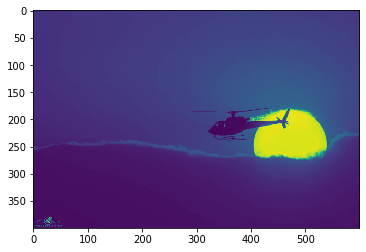

In [9]:
plt.imshow(img2gray)
img2gray[200:220,420:440]

150.0 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


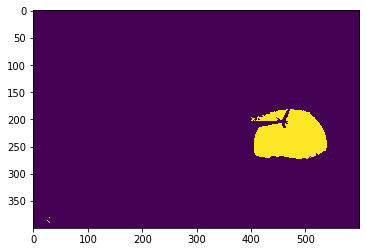

In [10]:
print(ret, mask)
plt.imshow(mask)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


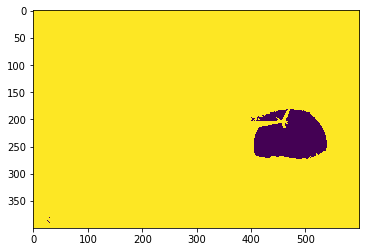

In [11]:
print(mask_inv)
plt.imshow(mask_inv)

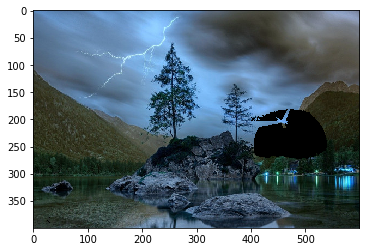

In [12]:
# Now black-out the area of sun in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
plt.imshow(img1_bg)

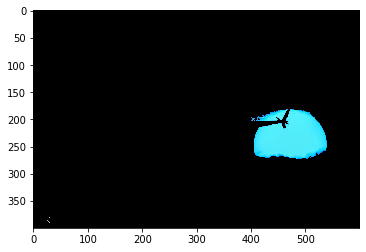

In [13]:
# Take only region of sun from sun image.
img1_fg = cv2.bitwise_and(img1,img1,mask = mask)
plt.imshow(img1_fg)

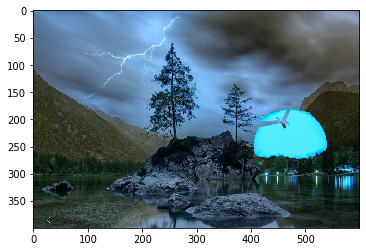

In [14]:
# Put sun in ROI and modify the main image
dst = cv2.add(img1_bg,img1_fg)
plt.imshow(dst)
img2[0:rows, 0:cols ] = dst

In [15]:
cv2.imshow('res',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()